# Funtional API
## Tipos de guardar os checkpoints
### Com save_weights()

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import os

In [21]:
# dados
x_train = np.random.uniform(low=-1, high=1, size=(1000, 2))
y_train = np.random.uniform(low=-1, high=1, size=(1000, 3))


inputs = Input(shape=(2,))
hidden1 = Dense(4, activation='sigmoid', use_bias=True)(inputs)
outputs = Dense(3, activation='softmax', use_bias=True)(hidden1)
print(f"input:{inputs}\nhidden1:{hidden1}\noutputs:{outputs}")


#tf.keras.backend.clear_session()
modelFunctionalPB = Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.Adam()
modelFunctionalPB.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])


modelFunctionalPB.fit(x_train, y_train, epochs=10, batch_size=32)

input:KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
hidden1:KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
outputs:KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")
Epoch 1/10
32/32 [==============================] - 0s 950us/step - loss: 0.4726 - accuracy: 0.3550
Epoch 2/10
32/32 [==============================] - 0s 940us/step - loss: 0.4689 - accuracy: 0.3430
Epoch 3/10
32/32 [==============================] - 0s 921us/step - loss: 0.4664 - accuracy: 0.3480
Epoch 4/10
32/32 [==============================] - 0s 946us/step - loss: 0.4646 - accuracy: 0.3500
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.3570
Epoch 6/10
32/32 [===========================

In [22]:
#formato .pb
tf.saved_model.save(modelFunctionalPB, './FunctionalAPICheckpoints/saved_model_pb')
#tf.keras.backend.clear_session()

INFO:tensorflow:Assets written to: ./FunctionalAPICheckpoints/saved_model_pb/assets


INFO:tensorflow:Assets written to: ./FunctionalAPICheckpoints/saved_model_pb/assets


# Subclassing API
## Tipos de guardar os checkpoints
### Com save_weights()

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#classificação de entrada de tamanho 2 e três classes de saída

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(2, activation='elu', bias_initializer='zeros')
        self.dense2 = tf.keras.layers.Dense(4, activation='elu', bias_initializer='zeros')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

tf.keras.backend.clear_session() #clear do kernel/variaveis/sessão
np.random.seed(0) #aleatoriedade
X_train = np.random.uniform(-1, 1, size=(1000, 2)) #gera matriz de numero aleatorios entre -1 e 1
y_train = np.random.randint(0, 3, size=(1000,)) #distribui os elementos por 3 classes

# num_classes = len(np.unique(y_train))
# print("Número de classes:", num_classes)

class_counts = np.bincount(y_train)
print("Número de elementos em cada classe:", class_counts)


modelSubclassingSaveWeights = MyModel() #modelo

Número de elementos em cada classe: [329 331 340]


In [10]:
modelSubclassingSaveWeights.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

Erro normal, porque é o subclassing API

In [11]:
#parameters
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [12]:
@tf.function
def train_step(features, labels):
    with tf.GradientTape() as tape:
        predictions = modelSubclassingSaveWeights(features)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, modelSubclassingSaveWeights.trainable_variables)
    optimizer.apply_gradients(zip(gradients, modelSubclassingSaveWeights.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)


EPOCHS = 30

for epoch in range(EPOCHS):
    # Reset das métricas no início de cada época
    train_loss.reset_states()
    train_accuracy.reset_states()

    train_step(X_train, y_train)

    template = 'Época {}, loss: {}, accuracy: {}'
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result()))

Época 1, loss: 1.0993332862854004, accuracy: 0.33799999952316284
Época 2, loss: 1.0991369485855103, accuracy: 0.33899998664855957
Época 3, loss: 1.0989502668380737, accuracy: 0.3409999907016754
Época 4, loss: 1.0987739562988281, accuracy: 0.34200000762939453
Época 5, loss: 1.0986073017120361, accuracy: 0.34200000762939453
Época 6, loss: 1.0984506607055664, accuracy: 0.34200000762939453
Época 7, loss: 1.0983037948608398, accuracy: 0.3440000116825104
Época 8, loss: 1.098166584968567, accuracy: 0.3449999988079071
Época 9, loss: 1.0980385541915894, accuracy: 0.3440000116825104
Época 10, loss: 1.0979197025299072, accuracy: 0.3440000116825104
Época 11, loss: 1.0978095531463623, accuracy: 0.34299999475479126
Época 12, loss: 1.0977075099945068, accuracy: 0.34299999475479126
Época 13, loss: 1.0976135730743408, accuracy: 0.34599998593330383
Época 14, loss: 1.0975264310836792, accuracy: 0.34599998593330383
Época 15, loss: 1.097446322441101, accuracy: 0.3479999899864197
Época 16, loss: 1.097372055

In [13]:
#
# SAVE_WEIGHTS
#    
modelSubclassingSaveWeights.save_weights('./SubclassingCheckpointsAPIs/SubclassingSaveWeights')

In [14]:
modelSubclassingSaveWeights.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  6         
                                                                 
 dense_1 (Dense)             multiple                  12        
                                                                 
 dense_2 (Dense)             multiple                  15        
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Aparece Multiple porque não consegue definir a que camadas pertencem pelo plor do modelo aparece só o modelo como um todo, uma box

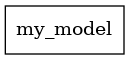

In [15]:
tf.keras.utils.plot_model(modelSubclassingSaveWeights, "wide_deep_subclass_model.png", show_shapes=True)

32/32 [==============================] - 0s 738us/step


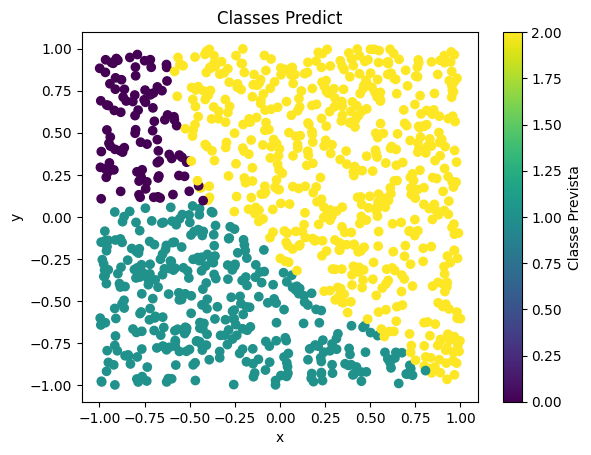

In [16]:
predictions = modelSubclassingSaveWeights.predict(X_train)
predicted_classes = np.argmax(predictions, axis=1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predicted_classes, cmap='viridis')
plt.title('Classes Predict')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Classe Prevista')
plt.show()

modelo com professor

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#classificação de entrada de tamanho 2 e três classes de saída

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(2, activation='elu', bias_initializer='zeros')
        self.dense2 = tf.keras.layers.Dense(4, activation='elu', bias_initializer='zeros')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        print(x)
        x = self.dense2(x)
        print(x)
        return self.dense3(x)

np.random.seed(0) #aleatoriedade
X_train = np.random.uniform(-1, 1, size=(1000, 2)) #gera matriz de numero aleatorios entre -1 e 1
y_train = np.random.randint(0, 3, size=(1000,)) #distribui os elementos por 3 classes

#classes
y1 = X_train/2
y2 = -X_train/2
x3 = 0

#y_train(y1>0 & y2>0) = 1
#y_train(y2<0 & x3<0) = 2
#y_train(x3>0 & y1<0) = 3



# Initialize y_train with zeros
#y_train = np.zeros_like(y1)


condition1 = np.logical_and(y1 > 0, y2 > 0)
y_train[condition1] = 1

condition2 = np.logical_and(y2 < 0, x3 < 0)
y_train[condition2] = 2

condition3 = np.logical_and(x3 > 0, y1 < 0)
y_train[condition3] = 3


plt.scatter(X_train[1, :], X_train[2, :])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [25]:
modeloProf = MyModel()

In [29]:
import numpy as np

In [50]:
np.random.seed(0) #aleatoriedade
N = 100000
X_train = np.random.uniform(-1, 1, size=(2, N)) #gera matriz de numero aleatorios entre -1 e 1


x1 = X_train[0,]
x2 = X_train[1,]

In [51]:
#classes
y = np.zeros(N)

#y1 = np.logical_and(x2<=-x1/2, x1<0)
#y[y1]=0

y[np.logical_and(x2<=-x1/2, x1<0)] = 1  

y[np.logical_and(x2<=x1/2, x1>=0)] = 2

In [ ]:
import matplotlib.pyplot as plt

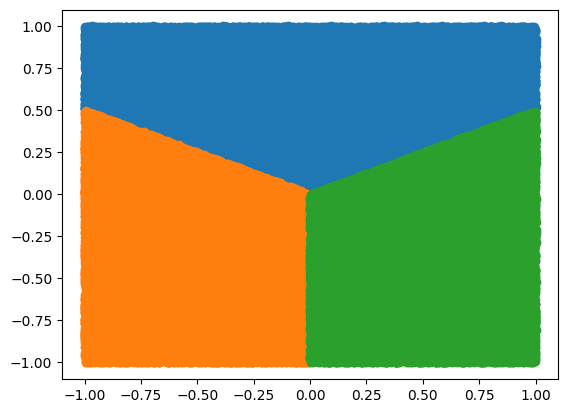

In [52]:
plt.scatter(x1[y==0] , x2[y==0])
plt.scatter(x1[y==1] , x2[y==1])
plt.scatter(x1[y==2] , x2[y==2])

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-05-09 11:08:36.523950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(4, activation='sigmoid', bias_initializer='zeros')
        self.dense2 = tf.keras.layers.Dense(3, activation='softmax')

    def get_kernel(self, layer_name):
        layer = getattr(self, layer_name)
        if hasattr(layer, 'kernel'):
            return layer.kernel
        else:
            raise ValueError(f"Layer '{layer_name}' doesn't have a kernel.")

    def call(self, inputs):
        x = self.dense1(inputs)
        s = self.dense2(x)
        return s

In [5]:
modelito = MyModel()

entrada = np.array([[1,1]])

entradaTensor = tf.convert_to_tensor(entrada)

modelito(entradaTensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.1133196 , 0.21023305, 0.6764474 ]], dtype=float32)>

In [6]:
modelito.get_kernel('dense1')

<tf.Variable 'my_model_1/dense_2/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.75540495,  0.5400655 ,  0.27698827,  0.23934579],
       [ 0.48250628, -0.14580417,  0.7527678 , -0.40219593]],
      dtype=float32)>

In [1]:
import numpy as np
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(4, activation='sigmoid', bias_initializer='zeros')
        self.dense2 = tf.keras.layers.Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        s = self.dense2(x)
        return s
    
    def get_kernels(self):
        kernels = []
        for layer in self.layers:
            if hasattr(layer, 'kernel'):
                kernels.append(layer.kernel)
        return kernels

# Teste do modelo e do método get_kernels
modelito = MyModel()
entrada = np.array([[1,1]])
entradaTensor = tf.convert_to_tensor(entrada)
modelito(entradaTensor)

# Obtendo os kernels de todas as camadas
kernels = modelito.get_kernels()
for i, kernel in enumerate(kernels):
    print(f"Kernel da camada {i + 1}:")
    print(kernel)


2024-05-09 11:10:56.052943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Kernel da camada 1:
<tf.Variable 'my_model/dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.16489458,  0.60595536, -0.4401033 ,  0.29238057],
       [ 0.72150826, -0.32511783,  0.52637076, -0.3879087 ]],
      dtype=float32)>
Kernel da camada 2:
<tf.Variable 'my_model/dense_1/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.22244847,  0.31782174,  0.7221383 ],
       [-0.29457843, -0.535632  , -0.5327512 ],
       [ 0.19943178, -0.04985756,  0.6211728 ],
       [-0.7737598 , -0.23341578, -0.90750414]], dtype=float32)>


In [64]:
w1 = tf.keras.layers.Dense(4, activation='linear')
w2 = tf.keras.layers.Dense(3, activation='linear')

In [66]:
entrada = np.array([[1,1]])

In [68]:
s = w1(entrada)

In [74]:
s

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.28551865, -0.6978364 ,  0.34265566, -0.19951677]],
      dtype=float32)>

In [71]:
s.shape

TensorShape([1, 4])

In [72]:
z = w2(s)

In [73]:
z

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.023348  ,  0.8705444 , -0.48144346]], dtype=float32)>

In [10]:
entrada = np.array([[1,1]])

In [11]:
entrada

array([[1, 1]])

In [12]:
entrada.shape

(1, 2)

In [13]:
modelo = MyModel()

In [26]:
s = modelo(entrada)

In [32]:
numpy_array = s.numpy()

In [34]:
numpy_array[0][0]  

0.24942449

In [35]:
sum(numpy_array[0])

0.9999999403953552

In [93]:
w = tf.keras.layers.Dense(3, activation='linear')

In [112]:
entrada4=np.array([[1,1,1,1,1]])
entrada4_np=np.array([[1,1,1,1,1]])

In [101]:
tf.convert_to_tensor(entrada4)

<tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[1, 1, 1, 1, 1]])>

In [102]:
w(entrada4)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.04968446,  1.2168593 , -1.2697815 ]], dtype=float32)>

In [103]:
w.kernel

<tf.Variable 'dense_16/kernel:0' shape=(5, 3) dtype=float32, numpy=
array([[ 0.58608145, -0.08728343, -0.6726353 ],
       [-0.25689644,  0.25013393,  0.19334811],
       [ 0.21796578,  0.39679998, -0.7769376 ],
       [ 0.2589144 ,  0.55604964,  0.3898459 ],
       [-0.85574967,  0.10115927, -0.4034025 ]], dtype=float32)>

In [113]:
aux = w.kernel
aux = aux.numpy()


entrada4_np*aux

ValueError: operands could not be broadcast together with shapes (1,5) (5,3) 

In [62]:
w(np.array([[1,1,1]]))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-1.0935543 ,  1.1719766 ,  0.51430464]], dtype=float32)>

In [107]:
w.bias

<tf.Variable 'dense_16/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [14]:
# -*- coding: utf-8 -*-
#
# This source code is licensed under the MIT license found in the
# LICENSE file in the root directory of this source tree.
""" nnfp.py

'Neural Audio Fingerprint for High-specific Audio Retrieval based on 
Contrastive Learning', https://arxiv.org/abs/2010.11910

USAGE:
    
    Please see test() in the below.
    
"""
import numpy as np
import tensorflow as tf
assert tf.__version__ >= "2.0"


class ConvLayer(tf.keras.layers.Layer):
    """
    Separable convolution layer
    
    Arguments
    ---------
    hidden_ch: (int)
    strides: [(int, int), (int, int)]
    norm: 'layer_norm1d' for normalization on Freq axis. (default)
          'layer_norm2d' for normalization on on FxT space 
          'batch_norm' or else, batch-normalization
    
    Input
    -----
    x: (B,F,T,1)
    
    [Conv1x3]>>[ELU]>>[BN]>>[Conv3x1]>>[ELU]>>[BN]
    
    Output
    ------
    x: (B,F,T,C) with {F=F/stride, T=T/stride, C=hidden_ch}
    
    """
    def __init__(self,
                 hidden_ch=128,
                 strides=[(1,1),(1,1)],
                 norm='layer_norm2d'):
        super(ConvLayer, self).__init__()
        self.conv2d_1x3 = tf.keras.layers.Conv2D(hidden_ch,
                                                 kernel_size=(1, 3),
                                                 strides=strides[0],
                                                 padding='SAME',
                                                 dilation_rate=(1, 1),
                                                 kernel_initializer='glorot_uniform',
                                                 bias_initializer='zeros')
        self.conv2d_3x1 = tf.keras.layers.Conv2D(hidden_ch,
                                                 kernel_size=(3, 1),
                                                 strides=strides[1],
                                                 padding='SAME',
                                                 dilation_rate=(1, 1),
                                                 kernel_initializer='glorot_uniform',
                                                 bias_initializer='zeros')
        
        if norm == 'layer_norm1d':
            self.BN_1x3 = tf.keras.layers.LayerNormalization(axis=-1)
            self.BN_3x1 = tf.keras.layers.LayerNormalization(axis=-1)
        elif norm == 'layer_norm2d':
            self.BN_1x3 = tf.keras.layers.LayerNormalization(axis=(1, 2, 3))
            self.BN_3x1 = tf.keras.layers.LayerNormalization(axis=(1, 2, 3))
        else:
            self.BN_1x3 = tf.keras.layers.BatchNormalization(axis=-1) # Fix axis: 2020 Apr20
            self.BN_3x1 = tf.keras.layers.BatchNormalization(axis=-1)
            
        self.forward = tf.keras.Sequential([self.conv2d_1x3,
                                            tf.keras.layers.ELU(),
                                            self.BN_1x3,
                                            self.conv2d_3x1,
                                            tf.keras.layers.ELU(),
                                            self.BN_3x1
                                            ])
        
    def get_kernels_conv(self):
        kernels = []
        for layer in self.forward.layers:
            if hasattr(layer, 'kernel'):
                kernels.append(layer.kernel)
        return kernels 
               
    def call(self, x):
        return self.forward(x)


class DivEncLayer(tf.keras.layers.Layer):
    """
    Multi-head projection a.k.a. 'divide and encode' layer:
        
    • The concept of 'divide and encode' was discovered  in Lai et.al.,
     'Simultaneous Feature Learning and Hash Coding with Deep Neural Networks',
      2015. https://arxiv.org/abs/1504.03410
    • It was also adopted in Gfeller et.al. 'Now Playing: Continuo-
      us low-power music recognition', 2017. https://arxiv.org/abs/1711.10958
    
    Arguments
    ---------
    q: (int) number of slices as 'slice_length = input_dim / q'
    unit_dim: [(int), (int)]
    norm: 'layer_norm1d' or 'layer_norm2d' uses 1D-layer normalization on the feature.
          'batch_norm' or else uses batch normalization. Default is 'layer_norm2d'.

    Input
    -----
    x: (B,1,1,C)
    
    Returns
    -------
    emb: (B,Q)
    
    """
    def __init__(self, q=128, unit_dim=[32, 1], norm='batch_norm'):
        super(DivEncLayer, self).__init__()

        self.q = q
        self.unit_dim = unit_dim
        self.norm = norm
        
        if norm in ['layer_norm1d', 'layer_norm2d']:
            self.BN = [tf.keras.layers.LayerNormalization(axis=-1) for i in range(q)]
        else:
            self.BN = [tf.keras.layers.BatchNormalization(axis=-1) for i in range(q)]
            
        self.split_fc_layers = self._construct_layers() 


    def build(self, input_shape):
        # Prepare output embedding variable for dynamic batch-size 
        self.slice_length = int(input_shape[-1] / self.q)

 
    def _construct_layers(self):
        layers = list()
        for i in range(self.q): # q: num_slices
            layers.append(tf.keras.Sequential([tf.keras.layers.Dense(self.unit_dim[0], activation='elu'),
                                               #self.BN[i],
                                               tf.keras.layers.Dense(self.unit_dim[1])]))
        return layers

 
    @tf.function
    def _split_encoding(self, x_slices):
        """
        Input: (B,Q,S)
        Returns: (B,Q)
        
        """
        out = list()
        for i in range(self.q):
            out.append(self.split_fc_layers[i](x_slices[:, i, :]))
        return tf.concat(out, axis=1)
    

    def get_kernels_div(self):
        kernels = []
        for layer in self.split_fc_layers:
            for sub_layer in layer.layers:
                if hasattr(sub_layer, 'kernel'):
                    kernels.append(sub_layer.kernel)
        return kernels

    
    def call(self, x): # x: (B,1,1,2048)
        x = tf.reshape(x, shape=[x.shape[0], self.q, -1]) # (B,Q,S); Q=num_slices; S=slice length; (B,128,8 or 16)
        return self._split_encoding(x)
    
    
class FingerPrinter(tf.keras.Model):
    """
    Fingerprinter: 'Neural Audio Fingerprint for High-specific Audio Retrieval
        based on Contrastive Learning', https://arxiv.org/abs/2010.11910
    
    IN >> [Convlayer]x8 >> [DivEncLayer] >> [L2Normalizer] >> OUT 
    
    Arguments
    ---------
    input_shape: tuple (int), not including the batch size
    front_hidden_ch: (list)
    front_strides: (list)
    emb_sz: (int) default=128
    fc_unit_dim: (list) default=[32,1]
    norm: 'layer_norm1d' for normalization on Freq axis. 
          'layer_norm2d' for normalization on on FxT space (default).
          'batch_norm' or else, batch-normalization.
    use_L2layer: True (default)
    
    • Note: batch-normalization will not work properly with TPUs.
                    
    
    Input
    -----
    x: (B,F,T,1)
    
        
    Returns
    -------
    emb: (B,Q) 
    
    """
    def __init__(self,
                 input_shape=(256,32,1),
                 front_hidden_ch=[128, 128, 256, 256, 512, 512, 1024, 1024],
                 front_strides=[[(1,2), (2,1)], [(1,2), (2,1)],
                                [(1,2), (2,1)], [(1,2), (2,1)],
                                [(1,1), (2,1)], [(1,2), (2,1)],
                                [(1,1), (2,1)], [(1,2), (2,1)]],
                 emb_sz=128, # q
                 fc_unit_dim=[32,1],
                 norm='layer_norm2d',
                 use_L2layer=True):
        super(FingerPrinter, self).__init__()
        self.front_hidden_ch = front_hidden_ch
        self.front_strides = front_strides
        self.emb_sz=emb_sz
        self.norm = norm
        self.use_L2layer = use_L2layer
        
        self.n_clayers = len(front_strides)
        self.front_conv = tf.keras.Sequential(name='ConvLayers')
        if ((front_hidden_ch[-1] % emb_sz) != 0):
            front_hidden_ch[-1] = ((front_hidden_ch[-1]//emb_sz) + 1) * emb_sz                
        
        # Front (sep-)conv layers
        #x = tf.zeros((1,)+ input_shape, dtype=tf.float32)
        #print(f"ConvLayer entrada: {self.front_conv(x).shape}")
        for i in range(self.n_clayers):
            self.front_conv.add(ConvLayer(hidden_ch=front_hidden_ch[i],
                strides=front_strides[i], norm=norm))
            #print(f"ConvLayer {i+1}: {self.front_conv(x).shape}")
        self.front_conv.add(tf.keras.layers.Flatten()) # (B,F',T',C) >> (B,D)
            
        # Divide & Encoder layer
        self.div_enc = DivEncLayer(q=emb_sz, unit_dim=fc_unit_dim, norm=norm)

    
    def get_kernels_conv(self):
        kernels = []
        for layer in self.front_conv.layers:
            if isinstance(layer, ConvLayer):
                kernels.extend(layer.get_kernels_conv())
        return kernels

        
    @tf.function
    def call(self, inputs):
        x = self.front_conv(inputs) # (B,D) with D = (T/2^4) x last_hidden_ch
        x = self.div_enc(x) # (B,Q)
        if self.use_L2layer:
            return tf.math.l2_normalize(x, axis=1) 
        else:
            return x


def get_fingerprinter(cfg, trainable=False):
    """
    Input length : 1s or 2s
    
    Arguements
    ----------
    cfg : (dict)
        created from the '.yaml' located in /config dicrectory

    Returns
    -------
    <tf.keras.Model> FingerPrinter object
    
    """
    input_shape = (256, 32, 1) 
    emb_sz = cfg['MODEL']['EMB_SZ']
    norm = cfg['MODEL']['BN']
    fc_unit_dim = [32, 1]
    
    m = FingerPrinter(input_shape=input_shape,
                      emb_sz=emb_sz,
                      fc_unit_dim=fc_unit_dim,
                      norm=norm)
    m.trainable = trainable
    return m
    

def test():
    input_1s = tf.constant(np.random.randn(3,256,32,1), dtype=tf.float32) # BxFxTx1
    fprinter = FingerPrinter(emb_sz=128, fc_unit_dim=[32, 1], norm='layer_norm2d')
    emb_1s = fprinter(input_1s) # BxD

    print(fprinter.get_kernels_conv())
    print("\n\ndiv\n\n")
    #fprinter.front_conv.get_kernels_conv()
    print(fprinter.div_enc.get_kernels_div())
"""    
    input_2s = tf.constant(np.random.randn(3,256,63,1), dtype=tf.float32) # BxFxTx1
    fprinter = FingerPrinter(emb_sz=128, fc_unit_dim=[32, 1], norm='layer_norm2d')
    emb_2s = fprinter(input_2s)
    #%timeit -n 10 fprinter(_input) # 27.9ms

Total params: 19,224,576
Trainable params: 19,224,576
Non-trainable params: 0

"""

"    \n    input_2s = tf.constant(np.random.randn(3,256,63,1), dtype=tf.float32) # BxFxTx1\n    fprinter = FingerPrinter(emb_sz=128, fc_unit_dim=[32, 1], norm='layer_norm2d')\n    emb_2s = fprinter(input_2s)\n    #%timeit -n 10 fprinter(_input) # 27.9ms\n\nTotal params: 19,224,576\nTrainable params: 19,224,576\nNon-trainable params: 0\n\n"

In [16]:
test()

[<tf.Variable 'conv2d_96/kernel:0' shape=(1, 3, 1, 128) dtype=float32, numpy=
array([[[[-0.07881468, -0.05547503, -0.06563027, -0.0307721 ,
          -0.02965135,  0.09198193,  0.02524945,  0.0799765 ,
           0.01317601,  0.11936231, -0.02953263,  0.05017255,
          -0.00575243, -0.02494531, -0.0099716 , -0.09367308,
          -0.05708983, -0.05903142, -0.07075563,  0.12327212,
          -0.04552533, -0.11927672,  0.00421849,  0.05120131,
          -0.06480276,  0.06153168,  0.06826927,  0.00861256,
          -0.01434595,  0.03923988,  0.01070659, -0.0322182 ,
          -0.06005282,  0.11904335,  0.09917086, -0.05538469,
          -0.04972102,  0.00911024, -0.00691472,  0.00789328,
          -0.1038169 , -0.00583059,  0.04525156, -0.02934219,
          -0.00267369, -0.10485044,  0.0081162 , -0.04275661,
          -0.12012273, -0.11457297, -0.11397707, -0.09562308,
          -0.02053504,  0.09468141,  0.06087659,  0.04234637,
           0.03362644,  0.02353698,  0.05857766, -0.07